<div style="
    font-family: 'Georgia', serif; 
    font-size: 48px; 
    color: #4CAF50; 
    text-align: center; 
    background-color: #f2f2f2; 
    border: 4px solid #4CAF50; 
    border-radius: 15px; 
    padding: 20px; 
    margin: 20px; 
    text-shadow: 2px 2px 5px #aaa;">
    🎬 SENTIMENT ANALYSIS ON MOVIE REVIEWS 
</div>


<div style="
    font-family: 'Georgia', serif; 
    font-size: 32px; 
    color: #2E8B57; 
    text-align: center; 
    background-color: #e6ffe6; 
    border: 2px solid #2E8B57; 
    border-radius: 10px; 
    padding: 15px; 
    margin: 15px; 
    text-shadow: 1px 1px 3px #888;">
    🎯 Import Necessary Libraries 
</div>


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import string

# Text processing and analysis
from textblob import TextBlob
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


<div style="
    font-family: 'Georgia', serif; 
    font-size: 32px; 
    color: #2E8B57; 
    text-align: center; 
    background-color: #e6ffe6; 
    border: 2px solid #2E8B57; 
    border-radius: 10px; 
    padding: 15px; 
    margin: 15px; 
    text-shadow: 1px 1px 3px #888;">
    🎯 Load DataSet
</div>


In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')  
df.sample(10)


,review,sentiment
35736,Eddie Izzard is a one-in-a-million comic geniu...,positive
32696,"Carlos Mencia continually, violently, hatefull...",negative
25899,The positives: It's shot pretty well. Has some...,negative
30013,I for one was glad to see Jim Carrey in a film...,positive
7466,What ever happened to shows with united parent...,negative
31257,One of the worst films I have ever seen. Got s...,negative
5307,The story by Norman Maclean is a masterwork; R...,negative
49265,I've been a devoted IMDB visitor for a few yea...,positive
24750,At the point in time that The Lady from Shangh...,positive
29417,I really wanted to like this movie. Great cast...,negative


<div style="
    font-family: 'Georgia', serif; 
    font-size: 32px; 
    color: #2E8B57; 
    text-align: center; 
    background-color: #e6ffe6; 
    border: 2px solid #2E8B57; 
    border-radius: 10px; 
    padding: 15px; 
    margin: 15px; 
    text-shadow: 1px 1px 3px #888;">
    EDA 🎯
</div>


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

418

In [3]:
df = df.drop_duplicates()

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
     Distribution of Sentiments ✨
</div>


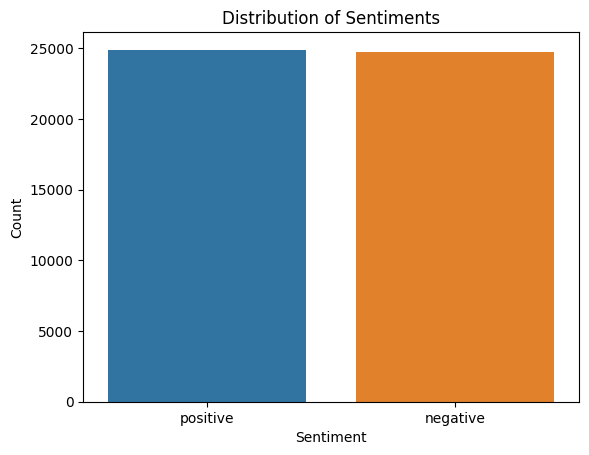

In [33]:
# Distribution of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Length of Reviews ✨
</div>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


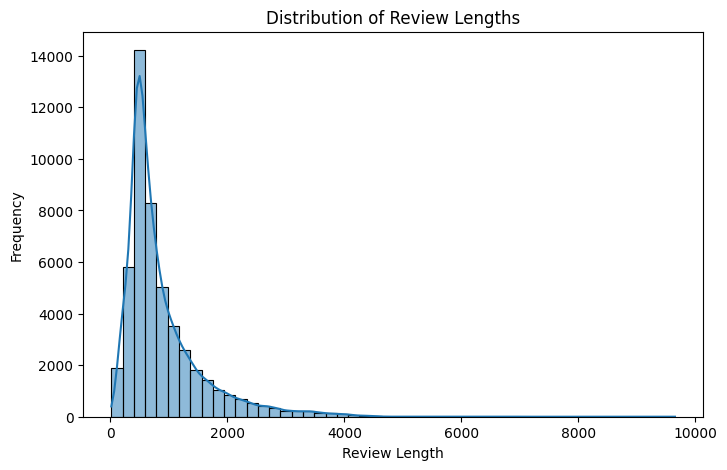

In [34]:
# Add a column for review length
df['review_length'] = df['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Word Cloud for Positive and Negative Reviews ✨
</div>


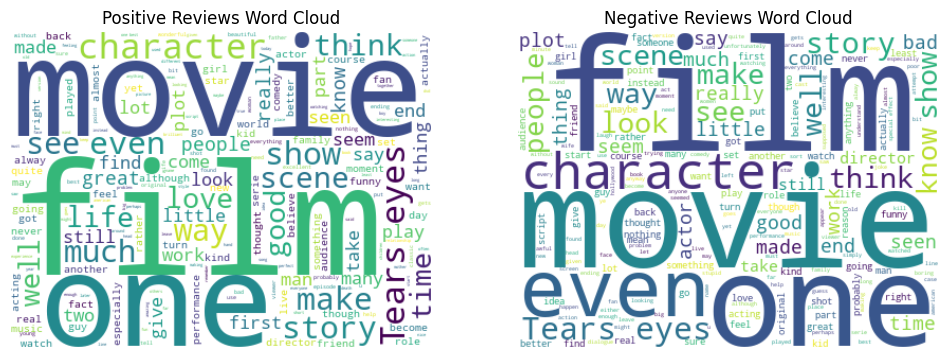

In [35]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])

# Positive reviews word cloud
plt.figure(figsize=(12, 6))
wordcloud_positive = WordCloud(width=400, height=300, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')




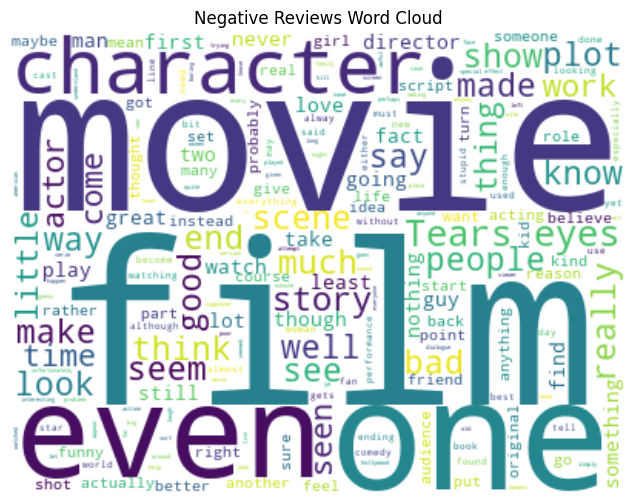

In [38]:
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['review'])
# Negative reviews word cloud
plt.figure(figsize=(12, 6))
wordcloud_negative = WordCloud(width=400, height=300, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Average Review Length by Sentiment ✨
</div>


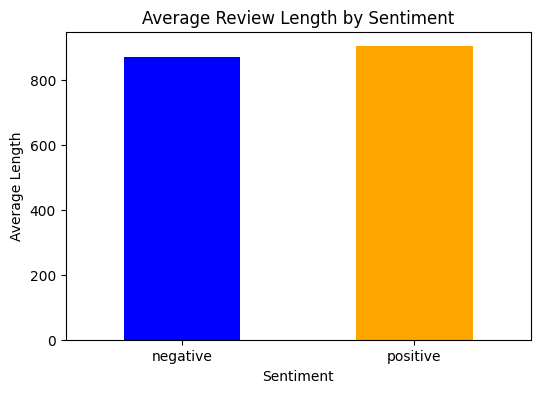

In [36]:
# Group by sentiment and calculate average review length
avg_review_length = df.groupby('sentiment')['review_length'].mean()

# Bar plot
avg_review_length.plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4))
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Length')
plt.xticks(rotation=0)
plt.show()


<div style="
    font-family: 'Georgia', serif; 
    font-size: 32px; 
    color: #2E8B57; 
    text-align: center; 
    background-color: #e6ffe6; 
    border: 2px solid #2E8B57; 
    border-radius: 10px; 
    padding: 15px; 
    margin: 15px; 
    text-shadow: 1px 1px 3px #888;">
    Text Preprocessing  🎯
</div>


<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Case normalization (lower/upper casing) ✨
</div>


In [4]:
df['review'] = df['review'].str.lower()

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Remove HTML tags and URLs ✨
</div>


In [5]:
 # remove tags 
def remove_tag(text):
    pattren = re.compile('<[^>]+>')
    return pattren.sub(r'', text)
# remove URLs 
def remove_urls(text):
    pattren = re.compile(r'\b(?:https?|ftp|www)\S+\b')
    return pattren.sub(r'', text)

df['review'] = df['review'].apply(remove_tag)
df['review'] = df['review'].apply(remove_urls)

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Remove emojis ✨
</div>


In [6]:
import re
def remove_emojis(text):
    # Define a regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE
    )
    # Substitute emojis with an empty string
    return emoji_pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_emojis)



<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    chat word treatment ✨
</div>


In [8]:
# Define a dictionary of chat word mappings
chat_words = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest/Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My A.. Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The A..",
"PRT": "Party",
"PRW": "Parents Are Watching",
"QPSA?": "Que Pasa?",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U": "You",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The F...",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait...",
"7K": "Sick:-D Laugher",
"TFW": "That feeling when",
"MFW": "My face when",
"MRW": "My reaction when",
"IFYP": "I feel your pain",
"TNTL": "Trying not to laugh",
"JK": "Just kidding",
"IDC": "I don't care",
"ILY": "I love you",
"IMU": "I miss you",
"ADIH": "Another day in hell",
"ZZZ": "Sleeping, bored, tired",
"WYWH": "Wish you were here",
"TIME": "Tears in my eyes",
"BAE": "Before anyone else",
"FIMH": "Forever in my heart",
"BSAAW": "Big smile and a wink",
"BWL": "Bursting with laughter",
"BFF": "Best friends forever",
"CSL": "Can't stop laughing"
}
def chat_conversion(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)



df['review'] = df['review'].apply(chat_conversion)

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Spell checking ✨
</div>


In [ ]:
# from textblob import TextBlob


# # Correct the spelling in each review
# df['review_corrected'] = df['review'].apply(lambda x: str(TextBlob(x).correct()))


<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Stop word removal ✨
</div>


In [9]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = [word for word in text.split() if word not in stop_words]
    return ' '.join(new_text)


df['review'] = df['review'].apply(remove_stopwords)

<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    Removing punctuation and digits ✨
</div>


In [10]:
# remove punctuation from discription column;
puncuations = string.punctuation
exclude = puncuations
def remove_punc(text):
    for char in exclude:
        text = text.replace(char, '')
        return text
    
    
df['review'] = df['review'].apply(remove_punc)

<div style="
    font-family: 'Georgia', serif; 
    font-size: 32px; 
    color: #2E8B57; 
    text-align: center; 
    background-color: #e6ffe6; 
    border: 2px solid #2E8B57; 
    border-radius: 10px; 
    padding: 15px; 
    margin: 15px; 
    text-shadow: 1px 1px 3px #888;">
    ML Models 🎯
</div>


<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    ✨ Logistic Regression
</div>


In [11]:
# Splitting data
X = df['review']
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Adjust sentiment label as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),  # Apply bigram (2-gram)
    ('classifier', LogisticRegression())  # Logistic Regression Model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('classifier', LogisticRegression())])

In [19]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


<div style="
    font-family: 'Georgia', serif; 
    font-size: 24px; 
    color: #4682B4; 
    text-align: center; 
    background-color: #f0f8ff; 
    border: 1px solid #4682B4; 
    border-radius: 8px; 
    padding: 10px; 
    margin: 10px; 
    text-shadow: 1px 1px 2px #aaa;">
    ✨ Naive Bayes
</div>


In [37]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),  # Apply bigram (2-gram)
    ('Naive Bayes', MultinomialNB())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Decision Tree Accuracy: 0.88


In [ ]:
 # Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")